In [3]:
import ee
# 4/1AbUR2VMW47-qgAo_uhtAgEKMAnprGHtTRT7kroWGSkumiWl3X9TUeDRzwOY
# Authenticate to Earth Engine
#ee.Authenticate()
ee.Initialize()

In [14]:
# Define the time range
start_date = '2023-01-01'
end_date = '2023-01-30'

# Define the AOI as a polygon
aoi = ee.Geometry.Polygon([[-7.791558613934031,33.01490300783628], [-7.792003860630503,33.01324314924896], [-7.788286318935862,33.01286529089581], [-7.788710107960215,33.014507163639024], [-7.791558613934031,33.01490300783628]])

In [18]:
# Load the Sentinel-2 L2A collection
s2 = ee.ImageCollection('COPERNICUS/S2_SR') \
        .filterDate(start_date, end_date) \
        .filterBounds(aoi) \
        .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \
        .map(lambda image: image.addBands(image.normalizedDifference(['B8', 'B4']).rename('NDVI')))

In [19]:
# Print the number of images in the collection
print('Number of images: ', s2.size().getInfo())

# Print the first image in the collection
print('First image: ', s2.first().getInfo())

Number of images:  3
First image:  {'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [1830, 1830], 'crs': 'EPSG:32629', 'crs_transform': [60, 0, 600000, 0, -60, 3700020]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32629', 'crs_transform': [10, 0, 600000, 0, -10, 3700020]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32629', 'crs_transform': [10, 0, 600000, 0, -10, 3700020]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32629', 'crs_transform': [10, 0, 600000, 0, -10, 3700020]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [5490, 5490], 'crs': 'EPSG:32629', 'crs_transfor

In [28]:
from IPython.display import Image

# Select a single image from the collection
image = s2.first()

# Generate a visualization of the image
vis = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 1000}

# Display the visualization
Image(url=image.select(['B4', 'B3', 'B2']).getThumbUrl(vis))

EEException: Image.visualize: No band named 'B8'. Available band names: [B4, B3, B2].

In [15]:
s2.firs

AttributeError: 'ImageCollection' object has no attribute 'firs'

TypeError: Image data of dtype object cannot be converted to float

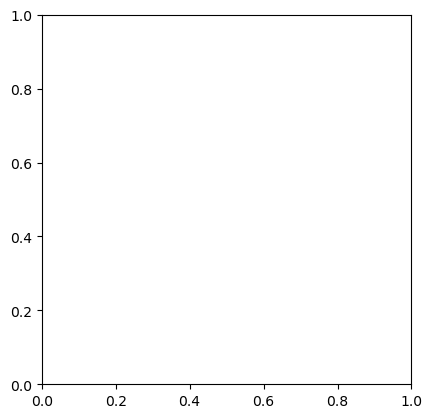

In [17]:
# Convert the image collection to a multi-band image
image = s2.toBands()

# Get the band names
band_names = image.bandNames().getInfo()

# Get the number of bands
num_bands = image.bandNames().size().getInfo()

# Create a list of band names
band_list = []
for i in range(num_bands):
    band_list.append(band_names[i])

# Get the image data as a numpy array
image_array = image.toArray().getInfo()

# Reshape the array into a 3D array
image_array = image_array.reshape(image.shape().getInfo()['coordinates'] + [num_bands])

# Display the image
plt.imshow(image_array)
plt.axis('off')
plt.show()